#### Earnings Data set

This notebook contains all the exercises for the Earninings data set.

This data set can be downloaded from the link below

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/


#### Exercise 14.04

In [ ]:
import pandas as pd

In [ ]:
filePath = '/content/drive/MyDrive/Packt_Colab/pandas_chapter11/chapter11/adult.data'

In [ ]:
data = pd.read_csv(filePath,delimiter=',',header=None)
data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data = data.drop([2,4,8,9],axis=1)

In [ ]:
data.columns = ['age','workclass','education','marital-status','occupation','relationship','capital-gain','capital-loss','hours-per-week','native-country','earning']
data.head()


,age,workclass,education,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,earning
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,0,0,40,Cuba,<=50K


In [ ]:
Q1_1 = data.groupby(['education'])['earning'].agg('count')
Q1_1


education
 10th              933
 11th             1175
 12th              433
 1st-4th           168
 5th-6th           333
 7th-8th           646
 9th               514
 Assoc-acdm       1067
 Assoc-voc        1382
 Bachelors        5355
 Doctorate         413
 HS-grad         10501
 Masters          1723
 Preschool          51
 Prof-school       576
 Some-college     7291
Name: earning, dtype: int64

In [ ]:
Q1_2 = data[data['earning'] == ' >50K'].groupby(['education'])['earning'].agg('count')
Q1_2


education
 10th              62
 11th              60
 12th              33
 1st-4th            6
 5th-6th           16
 7th-8th           40
 9th               27
 Assoc-acdm       265
 Assoc-voc        361
 Bachelors       2221
 Doctorate        306
 HS-grad         1675
 Masters          959
 Prof-school      423
 Some-college    1387
Name: earning, dtype: int64

In [ ]:
Q1_3 = pd.DataFrame((Q1_2 / Q1_1) * 100)
Q1_3.head()

,earning
education,
10th,6.645230
11th,5.106383
12th,7.621247
1st-4th,3.571429
5th-6th,4.804805


In [ ]:
Q1_3.columns = ['Proportion']
Q1_3.head()

,Proportion
education,
10th,6.645230
11th,5.106383
12th,7.621247
1st-4th,3.571429
5th-6th,4.804805


In [ ]:
Q1_3 = Q1_3.round({'Proportion': 2})
Q1_3.head()


,Proportion
education,
10th,6.65
11th,5.11
12th,7.62
1st-4th,3.57
5th-6th,4.80


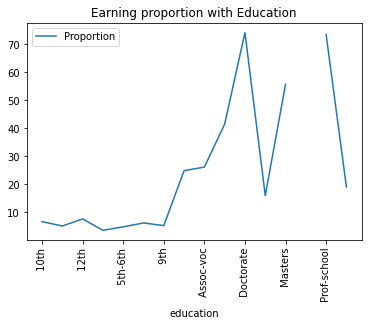

In [ ]:
Q1_3.plot.line(y='Proportion',rot=90,title='Earning proportion with Education')

In [ ]:
Q1_3 = Q1_3.reindex(index = [' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th', ' 11th', ' 12th',' HS-grad',' Some-college',' Assoc-acdm', ' Assoc-voc',' Bachelors',' Masters',' Prof-school',' Doctorate'])
Q1_3.head()


,Proportion
education,
1st-4th,3.57
5th-6th,4.80
7th-8th,6.19
9th,5.25
10th,6.65


Text(0, 0.5, 'Proportion')

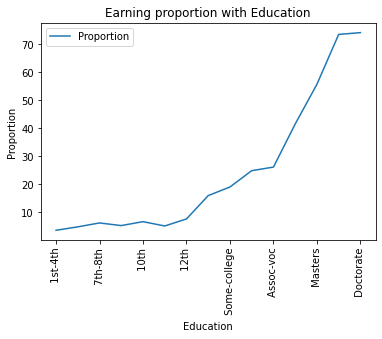

In [ ]:
propPlot = Q1_3.plot.line(y='Proportion',rot=90,title = 'Earning proportion with Education')

propPlot.set_xlabel("Education")
propPlot.set_ylabel("Proportion")


#### Exercise 14.05



In [ ]:
data['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [ ]:
len(set(data['hours-per-week']))

94

In [ ]:
cut_bins = [0, 20, 40, 60, 80,100]

In [ ]:
data['cut_hours'] = pd.cut(data['hours-per-week'], bins=cut_bins)
data.head()


,age,workclass,education,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,earning,cut_hours
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,2174,0,40,United-States,<=50K,"(20, 40]"
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,0,0,13,United-States,<=50K,"(0, 20]"
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,0,0,40,United-States,<=50K,"(20, 40]"
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40,United-States,<=50K,"(20, 40]"
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,0,0,40,Cuba,<=50K,"(20, 40]"


In [ ]:
Q2_1 = data.groupby(['cut_hours'])['earning'].agg('count')
Q2_1


cut_hours
(0, 20]       2928
(20, 40]     20052
(40, 60]      8471
(60, 80]       902
(80, 100]      208
Name: earning, dtype: int64

In [ ]:
Q2_2 = data[data['earning'] == ' >50K'].groupby(['cut_hours'])['earning'].agg('count')

Q2_3 = pd.DataFrame(Q2_2/Q2_1 * 100)
Q2_3


,earning
cut_hours,
"(0, 20]",6.659836
"(20, 40]",18.900858
"(40, 60]",40.750797
"(60, 80]",37.804878
"(80, 100]",30.288462


In [ ]:
Q2_3.columns = ['Proportion']

Q2_3 = Q2_3.round({'Proportion': 2})
Q2_3


,Proportion
cut_hours,
"(0, 20]",6.66
"(20, 40]",18.90
"(40, 60]",40.75
"(60, 80]",37.80
"(80, 100]",30.29


Text(0, 0.5, 'Proportion')

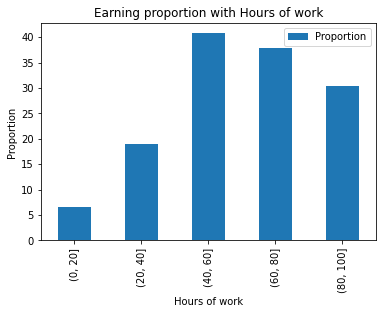

In [ ]:
hoursPlot = Q2_3.plot.bar(y='Proportion',rot=90,title = 'Earning proportion with Hours of work')

hoursPlot.set_xlabel("Hours of work")
hoursPlot.set_ylabel("Proportion")
